# Classify the iris family using Random Forest

#### import all reqiured models

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris_smpls=load_iris()

C:\Users\Akash\Anaconda3\envs\py6\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Akash\Anaconda3\envs\py6\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
dir(iris_smpls)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
df=pd.DataFrame(iris_smpls.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Add Target in dataframe

In [14]:
df['target']=iris_smpls.target
df.head()

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris_smpls.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
X=df.drop('target',axis='columns')
Y=df.target

#### Using train_test_split here makes dataset randomly split into categories

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [20]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
model.score(x_test,y_test)

1.0

In [22]:
y_predicted=model.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[ 8,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]], dtype=int64)

C:\Users\Akash\Anaconda3\envs\py6\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Akash\Anaconda3\envs\py6\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Text(69,0.5,'Truth')

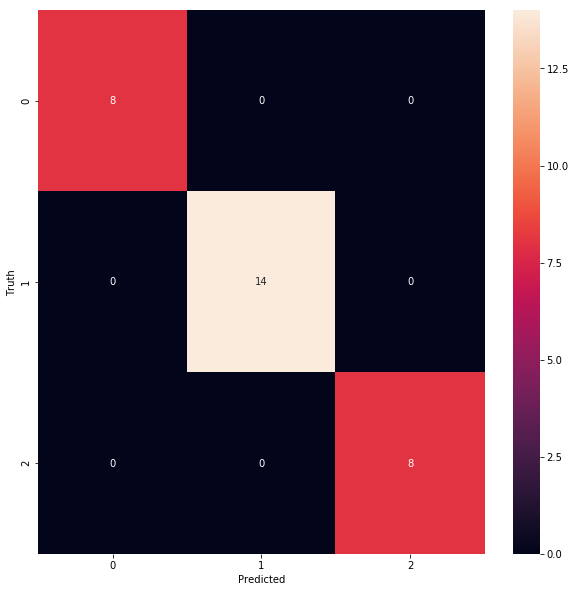

In [26]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
model.predict([[9.1,3.5,2.4,1.2]])

array([1])